In [ ]:
# @title ## Mount Your Google Drive

# @markdown The next two cells are **magic** cells.
# @markdown They look like text cells, but they run code behind the scenes.
# @markdown You can run them by either clicking on the ▶️ button (to the left of the cell), or by clicking on the cell and typing `Ctrl+Enter` (or `Shift+Enter`).

# @markdown Please run this cell and follow the steps printed after running it. Specifically, it will print a URL you should enter, follow the instructions there and paste the code in the textbox below (and type `Enter`).

from google.colab import drive

drive.mount("/content/gdrive")

In [ ]:
# @title ## Map Your Directory
import os


def check_assignment(assignment_dir, files_list):
    files_in_dir = set(os.listdir(assignment_dir))
    for fname in files_list:
        if fname not in files_in_dir:
            raise FileNotFoundError(f"could not find file: {fname} in assignment_dir")


assignment_dest = "/content/hw4"
assignment_dir = "/content/gdrive/MyDrive/DL4CV/hw4"  # @param{type:"string"}
assignment_files = [
    "ViT.ipynb",
    "functional.py",
    "models.py",
    "nn.py",
    "test_functional.py",
    "test_nn.py",
    "vit_helpers.py",
    "vit_trainer.py",
    "README.txt",
    "DCGAN",
]

# check Google Drive is mounted
if not os.path.isdir("/content/gdrive"):
    raise FileNotFoundError(
        "Your Google Drive isn't mounted. Please run the above cell."
    )

# check all files there
check_assignment(assignment_dir, assignment_files)

# create symbolic link
!rm -f {assignment_dest}
!ln -s "{assignment_dir}" "{assignment_dest}"
print(f'Succesfully mapped (ln -s) "{assignment_dest}" -> "{assignment_dir}"')

# cd to linked dir
%cd -q {assignment_dest}
print(f'Succesfully changed directory (cd) to "{assignment_dest}"')
# @markdown Set the path `assignment_dir` to the assignment directory in your Google Drive and run this cell.

# @markdown If you are not sure what is the path, you can use the **Files (📁)** menu (on the left side) to check the path.

## Imports and `autoreload`-Magic
Please run the cell below (only once) to load and set the `autoreload` magic, which automatically reloads the import calls to the python files with your solutions. That means that you can edit the files (in the right-side window), save them (`Ctrl+S`) and just re-run the relevant cells -- the new code will kick in automatically.

**Note:** The exercise works as is. **DO NOT ADD/MODIFY ANY IMPORTS!**

**Note:** You **MUST NOT** install any package. If you can't load something, you probably didn't follow the instructions (either didn't uploaded all the files, didn't mounted your Google driver or didn't mapped your directory).

**Note:** Make sure you run **all the cells** up to the point. Some cells depends on previous cells (mainly imports). Furthermore, make sure to run the cell below (with the autoreload magic) before any cell below it.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.getcwd()
os.chdir("/home/labs/antebilab/guyilan/Courses/DL4CV/hw4")

# Vision Transformer (ViT)

In this notebook you will implement parts of the Vision Transformer and train it on [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. If at any point you feel like you need a reminder of how a transformer looks like, we encourage you to go back and look at the ViT tutorial.

**Important notes:** 
* In some modules the instance variable names are given to you and you are not allowed to change them. If you do, your tests will fail.
* The exercise works as is. **DO NOT ADD/MODIFY ANY IMPORTS!** You are allowed to use `torch.Tensor`'s instance methods (e.g. `x.permute`).

# (A) Implement a Visual Transformer Block
In this part you will implement a ViT block using PyTorch. You will implement it in the following order:

1. **Attention function:** implement the attention operation on a given trio of queries, keys and values.
2. **Attention layer:** implement multi-head self attention (MHSA).
3. **ViT block:** implement a transformers block.


In each step you should fill the blanks (between `# BEGIN SOLUTION` and `# END SOLUTION`) in the relevant methods. DO NOT change any other code segments. You are provided with a cell to run the tests, and with a cell to debug your code (with the relevant imports). As a reminder, this notebook uses the `autoreload` magic which automatically reloads the imported `.py` files (just make sure you save these file with `Ctrl+S`).

***Note:*** you are not allowed to use PyTorch functions/modules unless it is imported in the files you were given.

## (A.1) Multi Head Attention function
Here you will implement the multi head attention function. The `multi_head_attention` function receives three arguments: 

  * `q`: the batched queries embeddings. Has shape `(batch_size, num_heads, sequence_size, head_emb_dim)`.
  * `k`: the batched keys embeddings. Has shape `(batch_size, num_heads, sequence_size, head_emb_dim)`.
  * `v`: the batched values embeddings. Has shape `(batch_size, num_heads, sequence_size, head_emb_dim)`.

It computes the (batched version of the) function: $$ \mathbf{y} = Softmax\left(\frac{QK^T}{\sqrt{d}}\right) V$$
where `d` is the embedding dimension within each head (`head_emb_dim`). The attention output `y` should have shape `(batch_size, sequence_size, num_heads * head_emb_dim)` (note that this is another step done after the calculation of the attention).

The skeleton of the `multi_head_attention` function is found in the `functional.py` file. Open this file by clicking on this link: `/content/hw4/functional.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `functional.py` to open it. The tests can be found in `test_functional.py` (link: `/content/hw4/test_functional.py`).

In [3]:
!python -m unittest test_functional.TestAttentionFunction

....
----------------------------------------------------------------------
Ran 4 tests in 2.356s

OK


In [4]:
# Playground for debugging
from functional import multi_head_attention

## (A.2) Multi Head Self Attention layer

Here you will implement the multi head self attention layer (MHSA) which inherits from PyTorch's `nn.Module`. When initialized, the layer receives the following arguments for initialization:

The input and output of the layer are both a sequence of tokens and of shape `(batch_size, sequence_size, dim)`.

* `dim`: the embedding dimension of each token in the sequence.
* `num_heads`: number of attention heads.

Your implementation should follow the MHSA architecture as you saw in class:
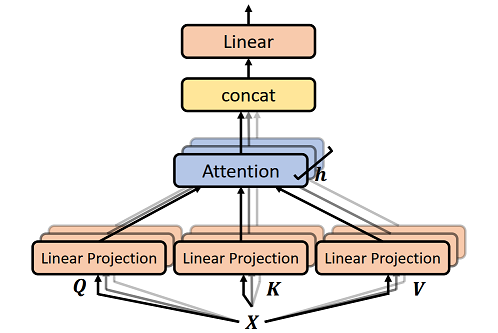

**Note:** The `dim` should be split evenly between the number of heads (`num_heads`), so the size of `q`, `k` and `v` is `(batch_size, sequence_size, num_heads, dim // num_heads)`.

The skeleton of the `MHSA` is found in the `nn.py` file. Open this file by clicking on this link: `/content/hw4/nn.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `nn.py` to open it. The tests can be found in `test_nn.py` (link: `/content/hw4/test_nn.py`).

In [5]:
!python -m unittest test_nn.TestMHSALayer

..
----------------------------------------------------------------------
Ran 2 tests in 2.264s

OK


In [6]:
# Playground for debugging
from nn import MHSA

## (A.3) Transformer block

In this section you will implement the transformer block. You will initialize all relevant layers in the `__init__` method and the forward pass in the `forward` method.

The input and output of the transformer block are both a sequence of tokens and of shape `(batch_size, sequence_size, dim)`.

The block receives the following arguments for initialization:

* `dim`: the embedding dimension of each token in the sequence.
* `num_heads`: number of attention heads.

Your implementation should follow the transformer block architecture as you saw in class:

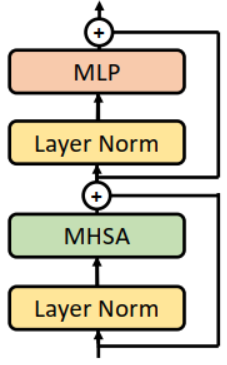

**Notes**:
1. You should use PyTorch's `nn.LayerNorm` (already imported).
2. The layer norm is learned, therefore you must define two separate instances of this class in the `__init__` method.
3. You should use your MHSA implementation from `nn.py`.
4. You should use the **MLP implementation** that is found in `vit_helpers.py` (already imported).

The skeleton of the `TransformerBlock` is found in the `nn.py` file. Open this file by clicking on this link: `/content/hw4/nn.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `nn.py` to open it. The tests can be found in `test_nn.py` (link: `/content/hw4/test_nn.py`).


In [18]:
!python -m unittest test_nn.TestTransformerBlock

..
----------------------------------------------------------------------
Ran 2 tests in 3.494s

OK


In [8]:
# Playground for debugging
from nn import TransformerBlock

### (B.1) Patch Embeddings

In this section you will implement both the `__init__` and `forward` methods of the patch embeddings layer. This layer divides an image into patches and projects them to a given dimension. In addition, you will implement a method called `get_sequence_size`, which returns the sequence length (the number of tokens) which is calculated using the image dimension (`img_dim`) and the patch size (`patch_dim`).

The `__init__` method initializes a layer that shall divide the image into patches and apply the projection to the new embedding dimension during the forward pass (note: this can be done using one layer!). It receives the following arguments:

* `patch_dim`: patch dimension. We use only squared patches and squared images so the total patch size is `(patch_dim, patch_dim)`.
* `in_chans`: number of channels in the input image.
* `dim`: The projection output dimension. This is the embedding dimension of each token in the sequence.

The `forward` method divides the image into patches, projects them to the wanted embedding dimension and flattens them. Make sure to reshape/permute your tensor for later stages if needed. The input and output to the layer are:

* `x`: the input image. Has shape `(batch_size, in_chans, img_dim, img_dim)` (for simplicity, we use only square images). 
* `y`: the output of the layer. This is the sequence of tokens, and it has shape `(batch_size, sequence_size, dim)`.

The skeleton of the `PatchEmbedding` layer is found in the `nn.py` file. Open this file by clicking on this link: `/content/hw4/nn.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `nn.py` to open it. The tests can be found in `test_nn.py` (link: `/content/hw4/test_nn.py`).


In [21]:

!python -m unittest test_nn.TestPatchEmbedding

F.
FAIL: testBackwards (test_nn.TestPatchEmbedding)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/labs/antebilab/guyilan/Courses/DL4CV/hw4/test_nn.py", line 182, in testBackwards
    assert compare(self.patch_proj.patch_embed.weight.grad.sum(), 1.9610e-05, 1e-5), "Incorrect output"
AssertionError: Incorrect output

----------------------------------------------------------------------
Ran 2 tests in 1.772s

FAILED (failures=1)


In [22]:
# Playground for debugging
from nn import PatchEmbedding

### (B.2) Positional Embedding

In this section you will implement both the `__init__` and `forward` methods of the positional embeddings. This module creates positional embeddings according to the sequence size and embedding dimension. Remember that the positional embeddings are learned.

In the `__init__` method you will initialize the positional embeddings. You should initialize the embeddings using PyTorch's `nn.init.trunc_normal_` method, which is already imported for you. You can find its source code [here](https://pytorch.org/docs/stable/_modules/torch/nn/init.html). Use the default parameters for this function, except for the std of the distribution with which you'll initialize.

The `__init__` method receives the following arguments:

* `sequence_size`: the sequence size (the number of tokens).
* `dim`: the embedding dimension of each token in the sequence.
* `init_std`: the standard deviation of the truncated normal distribution used for initialization.

The shape of the positional embeddings that is created should be `(1, sequence_size, dim)`. The `forward` method should return the positional embeddings that were already initialized.

**Important note:** 
You may NOT use PyTorch's nn.Embedding layer. Instead, create your own tensor to be the learned parameters. In this case, since we're to initialize a tensor instead of a Module class instance, it is important to wrap the created tensor with PyTorch's `nn.Parameter` (already imported for you). This will tell our model that this tensor is to be considered as a module parameter, and so it will be considered as part of the weights that are learned. Otherwise, the positional embeddings will not appear in the final model's `model.parameters()`, which is passed to the optimizer, hence the positional embeddings won't be learned. Another example is when calling `model.to(device)`, which passes all the model's parameters to be on the same device.

The skeleton of `PositionalEmbedding` is found in the `nn.py` file. Open this file by clicking on this link: `/content/hw4/nn.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `nn.py` to open it. The tests can be found in `test_nn.py` (link: `/content/hw4/test_nn.py`).

In [23]:
!python -m unittest test_nn.TestPositionalEmbedding

..
----------------------------------------------------------------------
Ran 2 tests in 1.505s

OK


In [24]:
# Playground for debugging
from nn import PositionalEmbedding

### (B.3) CLS token

In this section you will implement both the `__init__` and `forward` methods of the CLS token module. This module creates a CLS token according to the embedding dimension. Remember that this token is learned.

In the `__init__` method you will initialize the CLS token. You should initialize the embeddings using PyTorch's `nn.init.trunc_normal_` method, which is already imported for you. Use the default parameters for this function, except for the std of the distribution with which you'll initialize.

The `__init__` method receives the following arguments:

* `dim`: the embedding dimension of each token in the original sequence.
* `init_std`: the standard deviation of the truncated normal distribution used for initialization.

The shape of the CLS token that is created should be `(1, 1, dim)`. The `forward` method should return the CLS token that was already initialized.

**Important note:** 
You may NOT use PyTorch's nn.Embedding layer. Instead, create your own tensor to be the learned parameters. In this case, since we're to initialize a tensor instead of a Module class instance, it is important to wrap the created tensor with PyTorch's `nn.Parameter` (already imported for you). See further explanation for this in section (B.2).

The skeleton of `CLSToken` is found in the `nn.py` file. Open this file by clicking on this link: `/content/hw4/nn.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `nn.py` to open it. The tests can be found in `test_nn.py` (link: `/content/hw4/test_nn.py`).


In [25]:
!python -m unittest test_nn.TestCLSToken

..
----------------------------------------------------------------------
Ran 2 tests in 1.349s

OK


In [26]:
# Playground for debugging
from nn import CLSToken

### (C.1) Vision Transformer

In this section you will implement the complete Vision Transformer model. You will use the different parts that you implemented in previous sections in order to complete both the `__init__` and `forward` methods of your model.

In the `__init__` method you will initialize all relevant parts of the vision transformer:

* Patch embeddings: using the `PatchEmbedding` module implemented in (B.1).
* Positional embeddings: using the `PositionalEmbedding` module implemented in (B.2). Note that you can extract the sequence length and don't have to receive it as an argument to the `__init__` method.
* CLS token: using the `CLSToken` module implemented in (B.3).
* A sequence of transformer blocks (the transformer block was implemented in (A.3)).
* Classification: this is used to predict the final class using the CLS token taken from the last transformer block. You can use a single LayerNorm to apply on all the tokens, followed by a Linear layer that is applied only on the final CLS token (Pytorch's `LayerNorm` and `Linear` layers).

The `__init__` method receives the following arguments:
* `img_dim`: the image dimension (width and height).
* `patch_dim`: the patch dimension (width and height).
* `in_chans`: number of channels of the input image.
* `num_classes`: number of classes on which the model is to train on.
* `dim`: the tokens embedding dimension.
* `depth`: the number of transformer blocks in the model.
* `num_heads`: number of attention heads.
* `init_std`: the standard deviation of the truncated normal distribution used for initialization.

The `forward` input shape is `(batch_size, C, H, W)`, where in our case `H = W` (square images).

Your implementation should follow the vision transformer architecture as you saw in class:

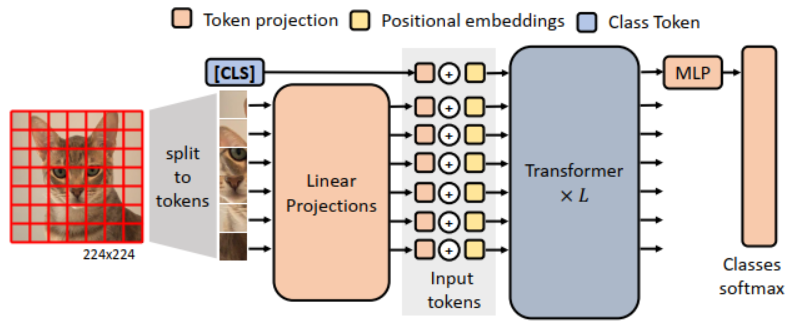


The skeleton of `ViT` is found in the `models.py` file. Open this file by clicking on this link: `/content/hw4/models.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `models.py` to open it.

In [27]:
# Playground for debugging
from models import ViT

### (C.2) Train Vision Transformer

The training process is provided to you. You can see the implementation in `vit_trainer.py`. It includes loading the train and test sets of MNIST, the training (`train_epoch`) and the test (`evaluate`), all combined in `train_vit` function.

You can look at this file by clicking on this link: `/content/hw4/vit_trainer.py`. Alternatively, you can go the left menu, click on **Files (📁)**, go to the directory `hw4` (or `content/hw4`) and double-click on `vit_trainer.py` to open it.

In this part you will need to use GPU. To get a GPU in Google Colab, please go to the top menu and to: **Runtime ➔ Change runtime type**. Then, select **GPU** as **Hardware accelerator**. Since your GPU time in Google colab is limited, please change your runtime type to GPU only when you finished debugging your model.

Once finished, please run the cells below to train your model.

**Note:** Unlike HW3, the training time of the ViT model may take longer than with CNN.

**Note:** Your GPU time in Google Colab is limited, please change your runtime type to 'None' after completing the training.

**Note:** You should NOT change anything in `vit_trainer.py`. If your accuracy is too low (less than 95%), please check your implementation.



In [28]:
import vit_trainer
import torch

assert torch.cuda.is_available(), "Cuda isn't available"
vit_trainer.train_vit()

Epoch: 1
[    0/60000 (  0%)]  Loss: 2.3027
[10000/60000 ( 17%)]  Loss: 1.8401
[20000/60000 ( 33%)]  Loss: 1.5574
[30000/60000 ( 50%)]  Loss: 1.1330
[40000/60000 ( 67%)]  Loss: 0.8733
[50000/60000 ( 83%)]  Loss: 0.5075

Average test loss: 0.5778  Accuracy: 8157/10000 (81.57%)

Epoch 1 execution time:  0.28 minutes

Epoch: 2
[    0/60000 (  0%)]  Loss: 0.6025
[10000/60000 ( 17%)]  Loss: 0.4816
[20000/60000 ( 33%)]  Loss: 0.3336
[30000/60000 ( 50%)]  Loss: 0.1916
[40000/60000 ( 67%)]  Loss: 0.2385
[50000/60000 ( 83%)]  Loss: 0.2956

Average test loss: 0.2425  Accuracy: 9254/10000 (92.54%)

Epoch 2 execution time:  0.24 minutes

Epoch: 3
[    0/60000 (  0%)]  Loss: 0.2639
[10000/60000 ( 17%)]  Loss: 0.1688
[20000/60000 ( 33%)]  Loss: 0.2566
[30000/60000 ( 50%)]  Loss: 0.2571
[40000/60000 ( 67%)]  Loss: 0.2014
[50000/60000 ( 83%)]  Loss: 0.1762

Average test loss: 0.1595  Accuracy: 9505/10000 (95.05%)

Epoch 3 execution time:  0.22 minutes

Epoch: 4
[    0/60000 (  0%)]  Loss: 0.1995
[1000

## (C.3) Saving your notebook
Once finished, **save (Ctrl + S)** the notebook and run the cell below for saving your notebook as html. 

In [ ]:
!jupyter nbconvert --to html ViT.ipynb0

# (D) Implement GAN using pytorch

In this section, you will implement the training part of GAN implementation. 

Save and close this notebook, open the notebook located in `DCGAN/main.ipynb` (in a different tab), and follow the instructions there.